In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

We want a graph with 
vertical axis: number of atoms that have been cooled until XXX year (cumulative)
horizontal axis: year
On each step we want to list isotopes that were newly cooled that year.

Link to Doc: https://docs.google.com/document/d/1BmLpwz7_J5fVurQjUiK6CT4JYH7Vivj12CPfxBUmEQ0/edit?tab=t.0

In [2]:
class LaserCooledIsotopes():
    def __init__(self, year, month, day, ref, atom_name, ion, isotope_number = ""):
        self.year = year      # publication year
        self.month = month    # publication month
        self.day = day        # publication day
        self.ref = ref        # e.g.: str "Wineland1999"
        self.atom_name = atom_name
        self.ion = ion        # if an ion is cooled, this is the charge. 0 if neutral.
        self.isotope_number = isotope_number

In [3]:
isotopes = []
isotopes.append(LaserCooledIsotopes(1993, 4, 12, "Setija1993", "H", 0, 1))
isotopes.append(LaserCooledIsotopes(1991, 9, 1, "Morita1991", "He", 0, 2))
isotopes.append(LaserCooledIsotopes(1982, 3, 1, "Phillips1982", "Na", 0))
isotopes.append(LaserCooledIsotopes(1993, 5, 1, "Li1993", "K", 0, 39))
isotopes.append(LaserCooledIsotopes(1993, 5, 1, "Li1993", "K", 0, 41))
isotopes.append(LaserCooledIsotopes(1999, 11, 1, "Modugno1999", "K", 0, 40))
isotopes.append(LaserCooledIsotopes(1992, 8, 29, "Wallace1992", "Rb", 0, 85))
isotopes.append(LaserCooledIsotopes(1992, 8, 29, "Wallace1992", "Rb", 0, 87))
isotopes.append(LaserCooledIsotopes(2001, 6, 8, "Schreck2001", "Li", 0, 6))
isotopes.append(LaserCooledIsotopes(1986, 5, 1, "Watt1986", "Cs", 0))
isotopes.append(LaserCooledIsotopes(1999, 2, 8, "Katori1999", "Sr", 0, 88))
isotopes.append(LaserCooledIsotopes(1992, 2, 1, "Madej1992", "Ba", 0, 138))
isotopes.append(LaserCooledIsotopes(2022, 3, 28, "In2022", "In", 0, 115))
isotopes.append(LaserCooledIsotopes(1990, 1, 1, "Klein1990", "Yb", 1, 172))
isotopes.append(LaserCooledIsotopes(1996, 2, 10, "Engelke1996", "Yb", 1, 171))
isotopes.append(LaserCooledIsotopes(1999, 4, 1, "Sugiyama1999", "Yb", 1, 174))
isotopes.append(LaserCooledIsotopes(1989, 11, 1, "Beverini1989", "Ca", 0))
isotopes.append(LaserCooledIsotopes(1990, 5, 15, "Madej1990", "Sr", 1, 88))
isotopes.append(LaserCooledIsotopes(2017, 10, 30, "Jung2017", "Sr", 1, 90))
isotopes.append(LaserCooledIsotopes(1978, 7, 24, "Neuhauser1978", "Ba", 1))
isotopes.append(LaserCooledIsotopes(1982, 11, 2, "Nagourney1983", "Mg", 1, 24))
isotopes.append(LaserCooledIsotopes(1986, 10, 6, "Berquist1986", "Hg", 1, 198))
isotopes.append(LaserCooledIsotopes(2009, 6, 12, "Campbell2009", "Th", 3, 232))
isotopes.append(LaserCooledIsotopes(2011, 6, 2, "Campbell2011", "Th", 3, 229))
isotopes.append(LaserCooledIsotopes(2016, 4, 18, "Paez2016", "Lu", 1, 175))
isotopes.append(LaserCooledIsotopes(2017, 12, 20, "Kaewuam22017", "Lu", 1, 176))
isotopes.append(LaserCooledIsotopes(2019, 6, 7, "Fan2019", "Ra", 1, 226))
isotopes.append(LaserCooledIsotopes(2021, 3, 31, "Baker2021", "Antihydrogen", 0, 1))
isotopes.append(LaserCooledIsotopes(1990, 2, 26, "Schroder1990", "Li", 1, 7))
isotopes.append(LaserCooledIsotopes(2018, 6, 18, "Inoue2018", "Eu", 0, 151))
isotopes.append(LaserCooledIsotopes(2023, 12, 5, "Fan2023", "Ra", 1, 224))
isotopes.append(LaserCooledIsotopes(2024, 2, 22, "Gloggler2024", "Ps", 0, 0)) # Positronium
isotopes.append(LaserCooledIsotopes(1998, 9, 1, "Guckert1998", "Rb", 0, 82))

In [4]:
def get_year(iso):
    return iso.year

isotopes.sort(key=get_year)

In [5]:
years = [iso.year for iso in isotopes]

year_first = min(years)
year_last = max(years)

In [6]:
isotopes_cooled = {} # key: year, element: cumulative isotopes cooled

for y in np.arange(year_first, year_last+1):
    isotopes_cooled[y] = 0

for element in isotopes:
    isotopes_cooled[element.year] += 1

cumulative_isotopes_cooled = {}
cumulative_quantity = 0
cumulative_isotopes_cooled[year_first - 2] = 0
cumulative_isotopes_cooled[year_first - 1] = 0

for year in sorted(isotopes_cooled.keys()):
    cumulative_quantity += isotopes_cooled[year]
    cumulative_isotopes_cooled[year] = cumulative_quantity

In [7]:
atoms_cooled = {} # key: year, element: cumulative atoms cooled
used_atoms = []

for y in np.arange(year_first, year_last+1):
    atoms_cooled[y] = 0

for element in isotopes:
    if(element.atom_name not in used_atoms):
        used_atoms.append(element.atom_name)
        atoms_cooled[element.year] += 1

cumulative_atoms_cooled = {}
cumulative_quantity = 0
cumulative_atoms_cooled[year_first - 2] = 0
cumulative_atoms_cooled[year_first - 1] = 0

for year in sorted(atoms_cooled.keys()):
    cumulative_quantity += atoms_cooled[year]
    cumulative_atoms_cooled[year] = cumulative_quantity

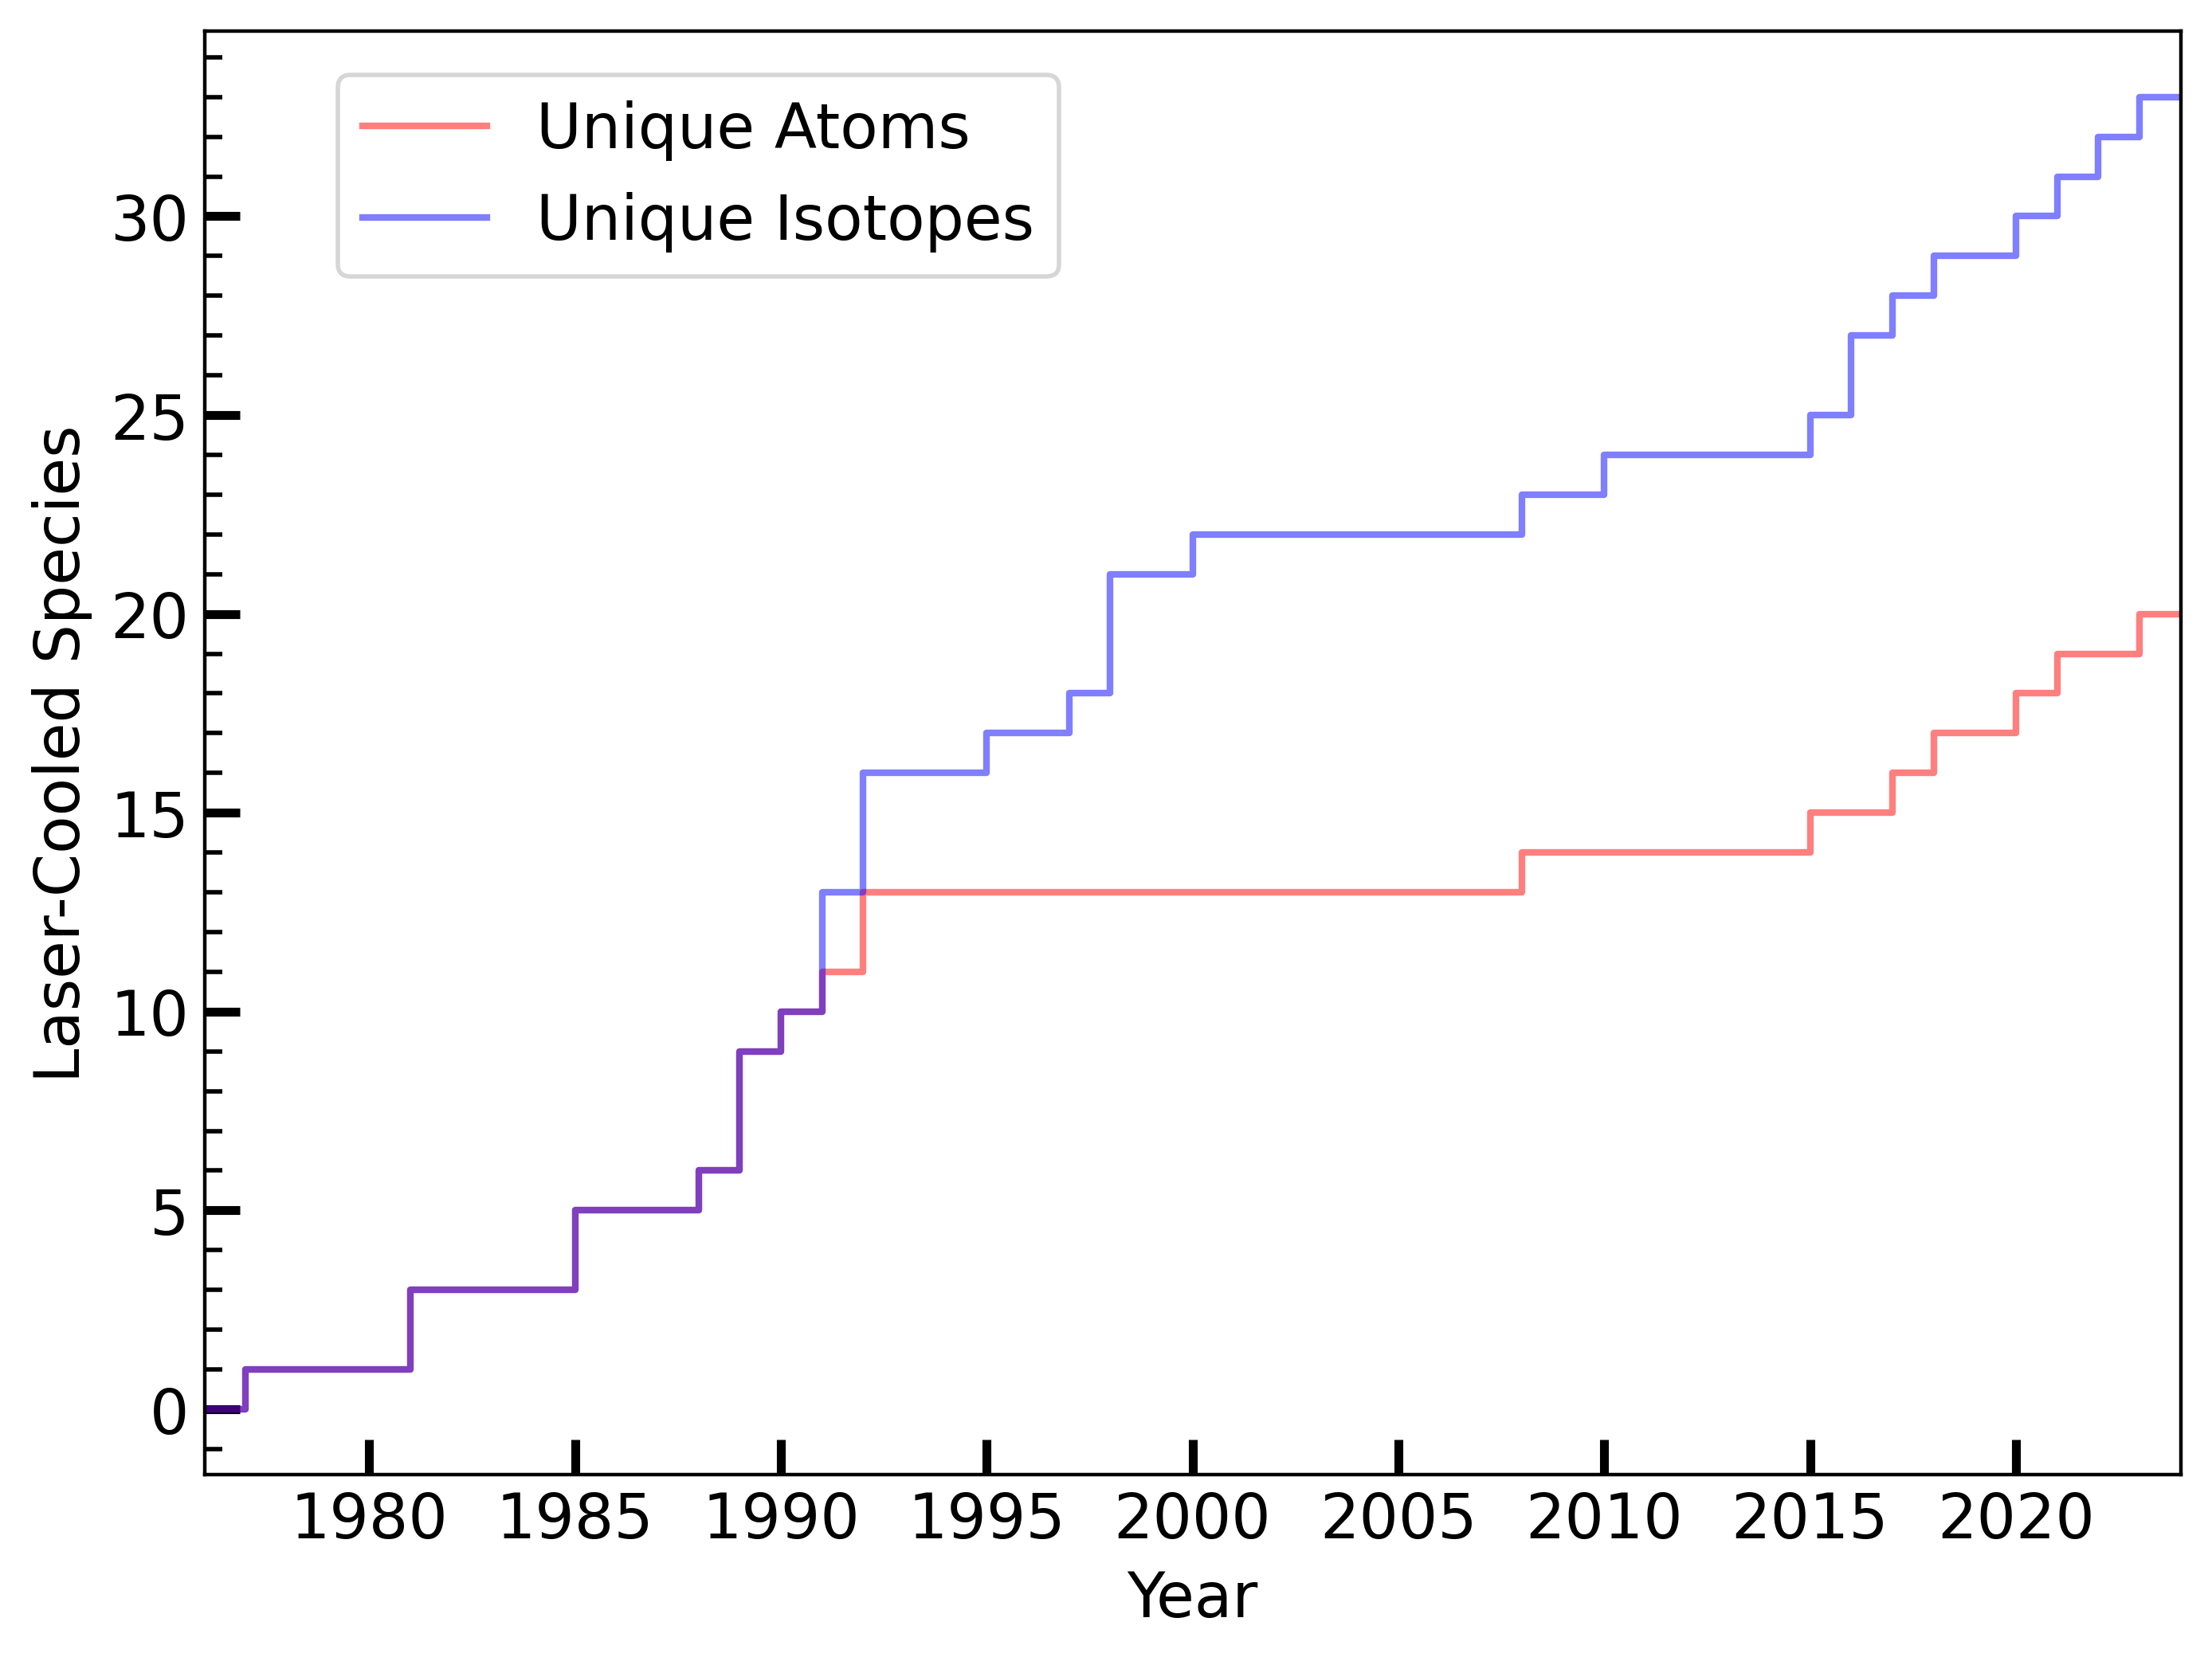

In [8]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=400)
ax.step(cumulative_atoms_cooled.keys(), cumulative_atoms_cooled.values(), label="Unique Atoms", color="red", alpha=0.5)
ax.step(cumulative_isotopes_cooled.keys(), cumulative_isotopes_cooled.values(), label="Unique Isotopes", color="blue", alpha=0.5)
ax.set_ylabel("Laser-Cooled Species", fontsize = 14)
ax.set_xlabel("Year", fontsize = 14)
ax.tick_params(axis="x",direction="in", labelsize=14)
ax.tick_params(axis="y",direction="in", labelsize=14)
ax.locator_params(nbins=10)
ax.legend(prop={'size': 14}, loc='center', bbox_to_anchor=(0.25, 0.9))
ax.set_xlim(year_first - 2, year_last)


major_locator_y = ticker.MultipleLocator(5)
minor_locator_y = ticker.MultipleLocator(1)

ax.yaxis.set_major_locator(major_locator_y)
ax.yaxis.set_minor_locator(minor_locator_y)

# Customize major and minor tick appearance (optional)
ax.tick_params(which='major', length=8, width=2, labelsize=14)
ax.tick_params(which='minor', length=4, width=1, labelsize=8, direction="in")
plt.savefig("first_laser_cooling_species.png", format='png', dpi=800, bbox_inches='tight', pad_inches=0.01)

In [18]:
# put x-axis in month